In [1]:
!pip install seaborn==0.9.0
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import seaborn as sns
import matplotlib.collections as clt
import matplotlib.pyplot as plt
from google.colab import files 
import os
import math
import datetime
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

     |████████████████████████████████| 215kB 5.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
###################Import binned data

In [2]:
##import 1-hr sessions
df_agg_binned = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig_5_and_6/df_agg_binned.csv"
df_agg_binned = pd.read_csv(url, parse_dates = True)
df_agg_binned.head()

###import multisite
df_binned = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig_5_and_6/df_binned.csv"
df_binned = pd.read_csv(url, parse_dates = True)
df_binned.head()

,Unnamed: 0,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Retrieval_Time,filename,group,sex,MM:DD:YYYY hh:mm:ss,RelativeTime,Errors,Mouse,MotorTurns,RelativeTime2,Retrieval_Time_filt,count,Retrieval_Time_filt_count,Retrieval_Time_filt_sum,Retrieval_Time_filt_percent,Errors_binned,Successes_binned,NewRT,active_bias,active_bias_percent
0,0.0,1.0,2.0,1.0,299.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-28 18:57:00,0 days 03:58:00,1.0,NaN,NaN,14280.0,NaN,12811.0,0.0,5474.0,0.427389,2.0,1.0,4.0,0.333333,33.333333
1,4.0,47.0,19.0,47.0,529.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-28 22:58:00,0 days 07:59:00,1.0,NaN,NaN,28740.0,10.0,12920.0,1.0,5514.0,0.427256,17.0,46.0,8.0,0.730159,73.015873
2,8.0,72.0,23.0,72.0,354.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 00:16:00,0 days 09:17:00,1.0,NaN,NaN,33420.0,4.0,12974.0,1.0,5534.0,0.426816,4.0,25.0,12.0,0.862069,86.206897
3,12.0,105.0,34.0,105.0,33.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 05:40:00,0 days 14:41:00,1.0,NaN,NaN,52860.0,3.0,13051.0,1.0,5561.0,0.426625,11.0,33.0,16.0,0.750000,75.000000
4,16.0,120.0,37.0,120.0,23.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 09:21:00,0 days 18:22:00,1.0,NaN,NaN,66120.0,6.0,13084.0,1.0,5574.0,0.426124,3.0,15.0,20.0,0.833333,83.333333


(-10.0, 110.0)

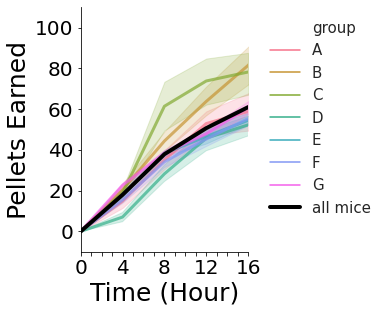

In [3]:
#Fig5A
import matplotlib.ticker as ticker


sns_plot, ax = plt.subplots(figsize = (3,4.5))

sns.set_style("white")


sns_plot = sns.lineplot(data = df_binned[df_binned.group!='H'], 
                   y = "Left_Poke_Count", 
                   x = "NewRT", hue = "group", 
                   palette='husl',
                    lw=3, ci=67, alpha=.7)

sns_plot = sns.lineplot(data = df_binned[df_binned.group!='H'], 
                   y = "Left_Poke_Count", 
                   x = "NewRT", label='all mice',
                  color='black', 
                    lw=4, ci=False)#, alpha=0)

# Formating legend and labels

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left',prop={'size': 12}, frameon=False)

#plt.title("FR", fontsize=25)
plt.ylabel("Pellets Earned", fontsize=25)
plt.xlabel("Time (Hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


plt.xlim(0,16) 

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
labels = ['0','','','','4','','','','8','','','','12','','','','16']
plt.xticks(x, labels, rotation='horizontal')
ax.get_legend().set_visible(False)
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={'size': 15}, frameon=False)


plt.xlim(0,16)
plt.ylim(-10,110)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("active_poke_count.pdf", bbox_inches = 'tight')
# files.download("active_poke_count.pdf")

In [4]:
#make a simpler df
df_binned2 = df_binned.filter(items=['NewRT', 'group', 'Left_Poke_Count','filename'])
df_binned2=df_binned2.dropna().reset_index()
df_binned3 = df_binned2.pivot(index=['filename','group'], columns='NewRT', values='Left_Poke_Count').reset_index()
df_binned3 = df_binned3.ffill(axis=1)
#now, melt back to long form
df_binned4 = df_binned3.melt(id_vars=['filename', 'group'], var_name='NewRT', value_name='Left_Poke_Count')
df_binned4['Left_Poke_Count'] = df_binned4['Left_Poke_Count'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


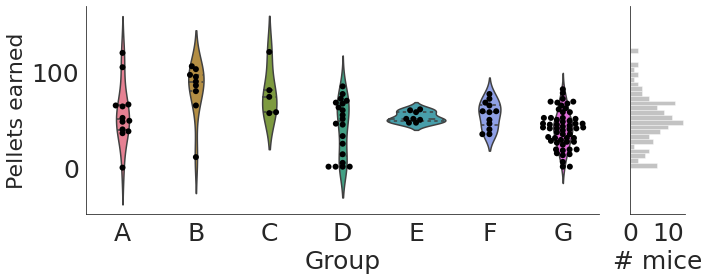

In [5]:

sns_plot, axes = plt.subplots(ncols=2, figsize=(10,4), gridspec_kw={'width_ratios': [7, 0.75]}, sharey='row')

x = df_binned4[df_binned4.NewRT==16]['group']
y = df_binned4[df_binned4.NewRT==16]['Left_Poke_Count']

sns.swarmplot(x,y, order=["A","B", "C", "D", "E", "F","G"], size =6, color="Black", ax=axes[0])

sns.violinplot(x, y, order=["A","B", "C", "D", "E", "F","G"], data=df_binned4[df_binned4.group!='VIC'], alpha=0.5, inner="quartile", palette="husl",  ax=axes[0])


data= df_binned4[df_binned4.group!='H'][df_binned4.NewRT==16]['Left_Poke_Count']
sns.distplot(data, bins=np.arange(0,150,5), kde=False, norm_hist=False, vertical=True,  ax=axes[1], color='dimgrey')


axes[0].tick_params(labelsize =25)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].tick_params(labelsize =25)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


axes[0].set_ylabel("Pellets earned", fontsize=22)
axes[0].set_xlabel("Group", fontsize=25)

axes[1].set_ylabel(" ", fontsize=1)
axes[1].set_xlabel("# mice", fontsize=25)

plt.tight_layout()


###uncomment below to download figure

# from google.colab import files
# plt.savefig("active_pokes.pdf", bbox_inches = 'tight')
# files.download("active_pokes.pdf")


([<matplotlib.axis.XTick at 0x7f3f0b2f5a50>,
 [Text(0, 0, '4'), Text(0, 0, '8'), Text(0, 0, '12'), Text(0, 0, '16')])

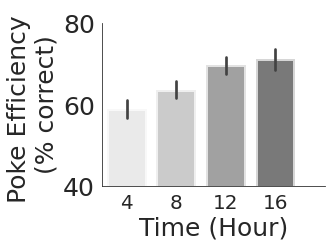

In [6]:
#Fig5C
import matplotlib.ticker as ticker

sns.color_palette(palette='pastel')
sns_plot, ax = plt.subplots(figsize = (4,3))
sns.set_style("white")



sns_plot = sns.barplot(data = df_binned[df_binned.group!='H'], 
                   y = "active_bias_percent",
                   x = "NewRT", 
                  palette='Greys',
                    lw=4, ci=67, alpha=.7, order=[4.0,8.0,12.0, 16])


plt.ylabel("Poke Efficiency \n(% correct)", fontsize=25)
plt.xlabel("Time (Hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(40,80)

x = [0,1,2,3,4]
labels = ['4','8','12','16']
plt.xticks(x, labels, rotation='horizontal', fontsize=20)



###uncomment below to download figure

# from google.colab import files
# plt.savefig("poke_efficiencey_bars.pdf", bbox_inches = 'tight')
# files.download("poke_efficiencey_bars.pdf")



([<matplotlib.axis.XTick at 0x7f3f0b274390>,
 [Text(0, 0, '4'), Text(0, 0, '8'), Text(0, 0, '12'), Text(0, 0, '16')])

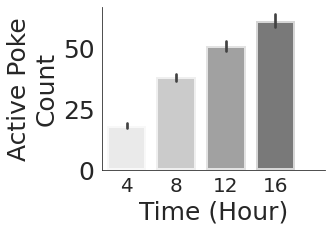

In [7]:
#Fig5D
import matplotlib.ticker as ticker

sns.color_palette(palette='pastel')
sns_plot, ax = plt.subplots(figsize = (4,3))
sns.set_style("white")
sns_plot = sns.barplot(data = df_binned[df_binned.group!='H'], 
                   y = "Left_Poke_Count",
                   x = "NewRT", 
                  palette='Greys',
                    lw=4, ci=67, alpha=.7, order=[4.0,8.0,12.0,16.0])
plt.ylabel("Active Poke\nCount", fontsize=25)
plt.xlabel("Time (Hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = [0,1,2,3,4]
labels = ['4','8','12','16']
plt.xticks(x, labels, rotation='horizontal', fontsize=20)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("poke_bars.pdf", bbox_inches = 'tight')
# files.download("poke_bars.pdf")


([<matplotlib.axis.XTick at 0x7f3f13c3c6d0>,
 [Text(0, 0, '4'), Text(0, 0, '8'), Text(0, 0, '12'), Text(0, 0, '16')])

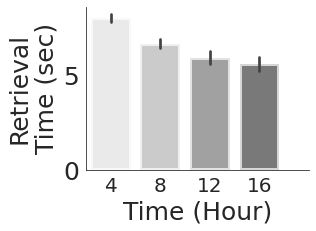

In [8]:
#Fig5E
import matplotlib.ticker as ticker

sns.color_palette(palette='pastel')
sns_plot, ax = plt.subplots(figsize = (4,3))
sns.set_style("white")

sns_plot = sns.barplot(data = df_binned[df_binned.group!='H'], 
                   y = "Retrieval_Time_filt",
                   x = "NewRT",
                  palette='Greys',
                    lw=4, ci=67, alpha=.7, order=[4.0,8.0,12.0,16.0])

plt.ylabel("Retrieval\nTime (sec)", fontsize=25)
plt.xlabel("Time (Hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = [0,1,2,3,4]
labels = ['4','8','12','16']
plt.xticks(x, labels, rotation='horizontal', fontsize=20)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("retrieval_time.pdf", bbox_inches = 'tight')
# files.download("retrieval_time.pdf")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

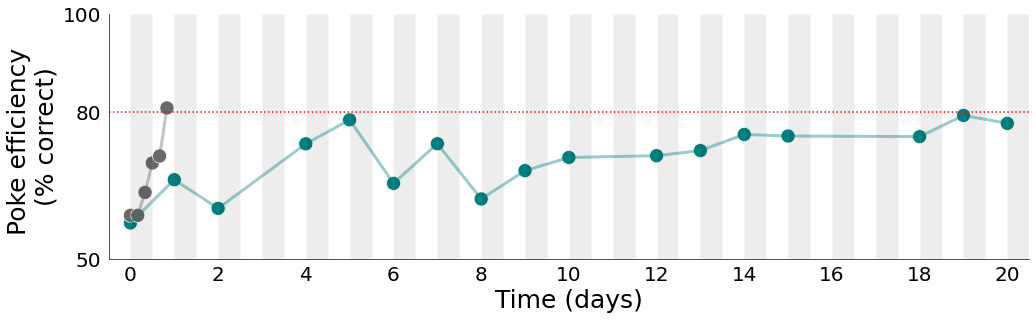

In [9]:
#Fig5F

df_binned_comp = df_binned[df_binned.group!='H']
df_binned_comp.rename(columns={'Mouse':'mouse'})
df_binned_comp['4hour'] = df_binned_comp['NewRT'].astype(int)
df_binned_comp['experiment'] = 'overnight'

df_agg_binned['experiment'] = '1_hr_daily'
df_for_comparison = df_binned_comp.append(df_agg_binned)

df_temp = df_for_comparison.filter(items=['experiment', '4hour', 'active_bias','filename'])
df_temp.tail(20)
df_most = df_temp[df_temp['experiment']=='overnight']
df_most = df_most[df_most['4hour']<=20]
df_most['day'] = df_most['4hour']/24


df_sin = df_temp[df_temp['experiment']=='1_hr_daily']

df_sin['day'] = df_sin['4hour']-1
df_sin = df_sin[df_sin.day<=20]

df_for_comparrison_b = df_most.append(df_sin)

df_for_comparrison_c = df_for_comparrison_b.groupby(['experiment', '4hour','day'], as_index=False)['active_bias'].mean()
#multiply active_bias by 100  for graphing as a percent
df_for_comparrison_c["active_bias"] = df_for_comparrison_c["active_bias"] * 100

#plot
import matplotlib.ticker as ticker

#set size, style, and colors
sns_plot, ax = plt.subplots(figsize = (16.5,4.5))
sns.set_style("white")
my_pal = {"overnight":"dimgrey", "1_hr_daily":"teal"}

#plot data
sns_plot = sns.scatterplot(data = df_for_comparrison_c, 
                   y = "active_bias", 
                   x = "day", hue = "experiment", 
                   palette=my_pal, s=200, legend=False)

sns_plot = sns.lineplot(data = df_for_comparrison_c, 
                   y = "active_bias", #
                   x = "day", hue = "experiment",
                   palette=my_pal, lw=3, alpha=0.4)
      

# Formating legend and labels
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper right',prop={'size': 15}, frameon=False)
plt.ylabel("Poke efficiency \n(% correct)", fontsize=25, color='black')
plt.xlabel("Time (days)", fontsize = 25, color='black')

#format ticks
plt.tick_params(axis='y', which='major', labelsize=20, colors = 'black')
plt.tick_params(axis='x', which='major', labelsize=20, colors = 'black')
plt.xticks(np.arange(0,21, 2))
plt.yticks([50,80, 100])

#axis limits
plt.xlim(-0.5,20.5)
plt.ylim(50,100)

#remove top and right spines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#red line
plt.axhline(80, color='red', linestyle='dotted')

#night time bars
for i in range (24):
  plt.fill([i,i+ 0.5,i+0.5,i],[100,100,1,1],'black',alpha=0.07)

ax.get_legend().set_visible(False)


###uncomment below to download figure

# from google.colab import files
# plt.savefig("comparrison_line.pdf", bbox_inches = 'tight')
# files.download("comparrison_line.pdf")


